In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# A. Preliminary Data Analysis

Analisis dilakukan untuk mengetahui tipe data dari masing-masing atribut, struktur data seperti berapa jumlah row dan kolom, info data, serta deskripsi data

In [2]:
# load data
data = pd.read_excel('D:\Dataset\Product Order\soal UTS BA 2023.xlsx')

In [3]:
# melihat 5 data pertama pada xlsx
data.head(5)

,Order ID,Customer Name,Customer City,Customer State,Customer Status,Order Date,Product ID,Product,Unit Price,Quantity,Discount,Full Price,Extended Price,Total Discount
0,10248,Suzan Plock,Pittsburgh,PA,Silver,2021-01-11,11,Queso Cabrales,14.0,12,0.0,168.0,168.0,0.0
1,10248,Suzan Plock,Pittsburgh,PA,Silver,2021-01-11,42,Singaporean Hokkien Fried Mee,9.8,10,0.0,98.0,98.0,0.0
2,10248,Suzan Plock,Pittsburgh,PA,Silver,2021-01-11,72,Mozzarella di Giovanni,34.8,5,0.0,174.0,174.0,0.0
3,10249,Allan Strate,Miami,FL,Platinum,2021-01-11,51,Manjimup Dried Apples,42.4,40,0.0,1696.0,1696.0,0.0
4,10249,Allan Strate,Miami,FL,Platinum,2021-01-11,14,Tofu,18.6,9,0.0,167.4,167.4,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order ID         2155 non-null   int64         
 1   Customer Name    2155 non-null   object        
 2   Customer City    2155 non-null   object        
 3   Customer State   2155 non-null   object        
 4   Customer Status  2155 non-null   object        
 5   Order Date       2155 non-null   datetime64[ns]
 6   Product ID       2155 non-null   int64         
 7   Product          2155 non-null   object        
 8   Unit Price       2155 non-null   float64       
 9   Quantity         2155 non-null   int64         
 10  Discount         2155 non-null   float64       
 11  Full Price       2155 non-null   float64       
 12  Extended Price   2155 non-null   float64       
 13  Total Discount   2155 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(

In [5]:
# Terdapat 2155 row data dengan 14 kolom
data.shape

(2155, 14)

Dapat dilihat bahwa kebanyakan data berupa object atau bentuk angka yaitu int64 dan float64. Terdapat juga kolom dengan tipe data datetime64, Hal ini merupakan informasi yang penting jika kita ingin melihat data dari range waktu. Namun untuk keperluan saat ini kita tidak memerlukannya. Pada bagian selanjutnya kita akan melakukan transformasi data dengan cara menghapuskan kolom yang tidak diperlukan. Pengubahan tipe data tidak akan dilakukan karena menurut penulis, tidak ada kolom yang perlu diubah tipe datanya pada saat ini

## B. Data Transformation

Berdasarkan informasi tipe data yang dimiliki. Nampaknya  ada data yang harus diganti tipenya yaitu Order Date menjadi object agar bisa dilakukan penghilangan outlier otomatis. Untuk keperluan analisis pada saat ini, terdapat 1 kolom yang akan dibuang yaitu:

>1. Total Discount

Kolom-kolom ini dibuang karena dinilai tidak diperlukan, sudah diwakili pada kolom lain, atau tidak akan menambahkan value pada analisis yang akan dilakukan. Order ID tetap dimasukan untuk mempermudah menghitung order yang terjadi.

In [6]:
# Pembuangan kolom
data = data.drop(['Total Discount'], axis=1)

In [10]:
data['Order Date'] = data['Order Date'].astype('object')

In [11]:
data.head(5)

,Order ID,Customer Name,Customer City,Customer State,Customer Status,Order Date,Product ID,Product,Unit Price,Quantity,Discount,Full Price,Extended Price
0,10248,Suzan Plock,Pittsburgh,PA,Silver,2021-01-11 00:00:00,11,Queso Cabrales,14.0,12,0.0,168.0,168.0
1,10248,Suzan Plock,Pittsburgh,PA,Silver,2021-01-11 00:00:00,42,Singaporean Hokkien Fried Mee,9.8,10,0.0,98.0,98.0
2,10248,Suzan Plock,Pittsburgh,PA,Silver,2021-01-11 00:00:00,72,Mozzarella di Giovanni,34.8,5,0.0,174.0,174.0
3,10249,Allan Strate,Miami,FL,Platinum,2021-01-11 00:00:00,51,Manjimup Dried Apples,42.4,40,0.0,1696.0,1696.0
4,10249,Allan Strate,Miami,FL,Platinum,2021-01-11 00:00:00,14,Tofu,18.6,9,0.0,167.4,167.4


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order ID         2155 non-null   int64  
 1   Customer Name    2155 non-null   object 
 2   Customer City    2155 non-null   object 
 3   Customer State   2155 non-null   object 
 4   Customer Status  2155 non-null   object 
 5   Order Date       2155 non-null   object 
 6   Product ID       2155 non-null   int64  
 7   Product          2155 non-null   object 
 8   Unit Price       2155 non-null   float64
 9   Quantity         2155 non-null   int64  
 10  Discount         2155 non-null   float64
 11  Full Price       2155 non-null   float64
 12  Extended Price   2155 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 219.0+ KB


## C. Data Cleaning

Cleaning Data dibagi menjadi beberapa langkah yaitu penghilangan data dengan nilai fantastis, mencari jumlah data yang hilang atau kosong, pengisian data atau penghilangan data yang kosong, penghapusan outlier

In [13]:
# Melihat atribut data untuk melihat adakah data yang salah masuk sehingga menimbulkan data fantastis
data.describe(include='all')

,Order ID,Customer Name,Customer City,Customer State,Customer Status,Order Date,Product ID,Product,Unit Price,Quantity,Discount,Full Price,Extended Price
count,2155.000000,2155,2155,2155,2155,2155,2155.000000,2155,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
unique,NaN,79,26,20,3,12,NaN,77,NaN,NaN,NaN,NaN,NaN
top,NaN,Neva Burgoyne,Charleston,FL,Gold,2021-06-11 00:00:00,NaN,Raclette Courdavault,NaN,NaN,NaN,NaN,NaN
freq,NaN,60,207,269,877,245,NaN,54,NaN,NaN,NaN,NaN,NaN
mean,10659.375870,NaN,NaN,NaN,NaN,NaN,40.793039,NaN,26.218520,23.812993,0.056237,628.519067,587.374886
std,241.378032,NaN,NaN,NaN,NaN,NaN,22.159019,NaN,29.827418,19.022047,0.083466,1036.466980,969.224262
min,10248.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,0.000000,4.800000,4.800000
25%,10451.000000,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,12.000000,10.000000,0.000000,154.000000,147.000000
50%,10657.000000,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,18.400000,20.000000,0.000000,360.000000,337.750000
75%,10862.500000,NaN,NaN,NaN,NaN,NaN,60.000000,NaN,32.000000,30.000000,0.100000,722.250000,656.000000


Dari hasil describe yang didapatkan kita memperoleh data-data numerik yang penting yaitu unit Price, Quantitiy, Discount, Full Price, dan Extended Price. Informasi yang didapat adalah
>1. Unit price memiliki rentang nilai dari 2 sampai dengan 263.5 dengan mean 26.21 dan std 29.8. Berdasarkan jarak data, nampaknya penggunaan mean untuk mengisi nilai null dapat dilakukan.
>2. Quantity pun memiliki nilai yang masuk akal dengan rentan 1 sampai 130 dan std 19 sehingga mean menjadi kandidat untuk digunakan sebagai imputasi
>3. Jika ada data discount yang kosong, maka lebih masuk akal jika discountnya dikosongkan saja. Namun dari informasi yang didapat, data discount memiliki nilai yang masuk akal
>4. Full Price merupakan hasil kali Unit Price dengan Quantity sehingga imputasi akan dilakukan dengan cara demikian juga. Hal serupa pun akan dilakukan pada extended price yang berupa full price - full price * discount.

Dari data yang dilihat, sepertinya tidak ada nilai yang fantastis yang perlu dibuat terlebih dahulu, nilai Full Price memang mencurigakan dengan value 15810, namun jika dihitung antara price dan quantity yang paling besar, nilai maximumnya lebih dari 30000 sehingga value 15810 masih dinilai masuk akal. Namun nilai mungkin berubah pada penghapusan outlier

Kita juga akan melihat apabila ada data yang kosong

In [14]:
data.isna().sum()

Order ID           0
Customer Name      0
Customer City      0
Customer State     0
Customer Status    0
Order Date         0
Product ID         0
Product            0
Unit Price         0
Quantity           0
Discount           0
Full Price         0
Extended Price     0
dtype: int64

Tidak ada data kosong, sehingga kita bisa langsung menghilangkan outlier

In [15]:
# shape data sebelum penghilang outlier
data.shape

(2155, 13)

In [16]:
# Pembuatan IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR=Q3-Q1
IQR

C:\Users\JEREMY\AppData\Local\Temp\ipykernel_3440\361553521.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
C:\Users\JEREMY\AppData\Local\Temp\ipykernel_3440\361553521.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)


Order ID          411.50
Product ID         38.00
Unit Price         20.00
Quantity           20.00
Discount            0.10
Full Price        568.25
Extended Price    509.00
dtype: float64

In [17]:
# Print all the outlier
outliers= data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers.shape

C:\Users\JEREMY\AppData\Local\Temp\ipykernel_3440\1162919287.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers= data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]


(257, 13)

Terlihat ada 257 data yang akan dihapuskan karena lebih atau kurang dari outlier. Kita mempunya lebih dari 2000 data, sehingga penghapusan data seharusnya tidak terlalu berpengaruh

In [18]:
data_clean = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_clean.sample(5)

C:\Users\JEREMY\AppData\Local\Temp\ipykernel_3440\1107885679.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]


,Order ID,Customer Name,Customer City,Customer State,Customer Status,Order Date,Product ID,Product,Unit Price,Quantity,Discount,Full Price,Extended Price
954,10609,Allan Strate,Miami,FL,Platinum,2021-06-11 00:00:00,21,Sir Rodney's Scones,10.0,6,0.00,60.0,60.0
726,10522,Robin Balla,Kansas City,MO,Gold,2021-05-11 00:00:00,1,Chai,18.0,40,0.20,720.0,576.0
1438,10798,Dominic Loran,Tacoma,WA,Gold,2021-08-11 00:00:00,72,Mozzarella di Giovanni,34.8,10,0.00,348.0,348.0
1378,10771,Marco Trautmann,Charleston,SC,Platinum,2021-08-11 00:00:00,71,Fløtemysost,21.5,16,0.00,344.0,344.0
1455,10804,Cathrine Ecton,St. Petersburg,FL,Silver,2021-08-11 00:00:00,49,Maxilaku,20.0,4,0.15,80.0,68.0


In [19]:
data_clean.shape

(1898, 13)

## D.  Analisis Deskriptive

Dalam bagian ini kita akan mencari tahu state mana yang memiliki jumlah customer paling banyak dengan tambahan yaitu persebaran status customer

In [20]:
# State dengan customer terbanyak
most_customer_state = data_clean.groupby(by='Customer State').agg({'Customer Name':'nunique'}).reset_index()
most_customer_state.sort_values(by='Customer Name',ascending=False)

,Customer State,Customer Name
3,FL,8
13,PA,8
15,SC,7
9,MO,7
11,NY,6
12,OH,5
19,WA,4
18,VA,4
17,UT,4
5,HI,4


Dapat dilihat bahwa Negara Bagian Florida memiliki customer terbanyak dengan jumlah 8 Customer, Pennsylvania dengan 8 orang,  South Carolina dengan 7 Customer, dan Missouri dengan 7 Customer. Lalu bagaimanakah persebaran status customer pada setiap state? Dalam hal ini kita harus membuat dataframe dengan pembagian customer berdasarkan statusnya sebagai berikut:

In [21]:
cond_platinum = data_clean['Customer Status'] == 'Platinum'
cond_gold = data_clean['Customer Status'] == 'Gold'
cond_silver = data_clean['Customer Status'] == 'Silver'

In [22]:
data_platinum = data_clean[cond_platinum]
data_platinum

,Order ID,Customer Name,Customer City,Customer State,Customer Status,Order Date,Product ID,Product,Unit Price,Quantity,Discount,Full Price,Extended Price
4,10249,Allan Strate,Miami,FL,Platinum,2021-01-11 00:00:00,14,Tofu,18.60,9,0.00,167.4,167.40
5,10250,Elnora Willison,Philadelphia,PA,Platinum,2021-01-11 00:00:00,51,Manjimup Dried Apples,42.40,35,0.15,1484.0,1261.40
6,10250,Elnora Willison,Philadelphia,PA,Platinum,2021-01-11 00:00:00,41,Jack's New England Clam Chowder,7.70,10,0.00,77.0,77.00
7,10250,Elnora Willison,Philadelphia,PA,Platinum,2021-01-11 00:00:00,65,Louisiana Fiery Hot Pepper Sauce,16.80,15,0.15,252.0,214.20
8,10251,Daniela Becknell,Tacoma,WA,Platinum,2021-01-11 00:00:00,65,Louisiana Fiery Hot Pepper Sauce,16.80,20,0.00,336.0,336.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,11072,Ed Hubley,Alexandria,VA,Platinum,2021-12-11 00:00:00,50,Valkoinen suklaa,16.25,22,0.00,357.5,357.50
2123,11074,Maricela Divis,Alexandria,VA,Platinum,2021-12-11 00:00:00,16,Pavlova,17.45,14,0.05,244.3,232.08
2127,11076,Alton Wareing,Ann Arbor,MI,Platinum,2021-12-11 00:00:00,19,Teatime Chocolate Biscuits,9.20,10,0.25,92.0,69.00
2128,11076,Alton Wareing,Ann Arbor,MI,Platinum,2021-12-11 00:00:00,6,Grandma's Boysenberry Spread,25.00,20,0.25,500.0,375.00


In [23]:
data_gold = data_clean[cond_gold]
data_gold

,Order ID,Customer Name,Customer City,Customer State,Customer Status,Order Date,Product ID,Product,Unit Price,Quantity,Discount,Full Price,Extended Price
17,10254,Tyrone Hine,Pittsburgh,PA,Gold,2021-01-11 00:00:00,55,Pâté chinois,19.20,21,0.15,403.2,342.72
18,10254,Tyrone Hine,Pittsburgh,PA,Gold,2021-01-11 00:00:00,74,Longlife Tofu,8.00,21,0.00,168.0,168.00
19,10254,Tyrone Hine,Pittsburgh,PA,Gold,2021-01-11 00:00:00,24,Guaraná Fantástica,3.60,15,0.15,54.0,45.90
20,10255,Christin Tillinghast,Tacoma,WA,Gold,2021-01-11 00:00:00,36,Inlagd Sill,15.20,25,0.00,380.0,380.00
21,10255,Christin Tillinghast,Tacoma,WA,Gold,2021-01-11 00:00:00,59,Raclette Courdavault,44.00,30,0.00,1320.0,1320.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,11063,Tyrone Hine,Pittsburgh,PA,Gold,2021-12-11 00:00:00,41,Jack's New England Clam Chowder,9.65,30,0.10,289.5,260.55
2095,11063,Tyrone Hine,Pittsburgh,PA,Gold,2021-12-11 00:00:00,40,Boston Crab Meat,18.40,40,0.10,736.0,662.40
2124,11075,Noreen Riess,Rochester,NY,Gold,2021-12-11 00:00:00,46,Spegesild,12.00,30,0.15,360.0,306.00
2125,11075,Noreen Riess,Rochester,NY,Gold,2021-12-11 00:00:00,2,Chang,19.00,10,0.15,190.0,161.50


In [24]:
data_silver = data_clean[cond_silver]
data_silver

,Order ID,Customer Name,Customer City,Customer State,Customer Status,Order Date,Product ID,Product,Unit Price,Quantity,Discount,Full Price,Extended Price
0,10248,Suzan Plock,Pittsburgh,PA,Silver,2021-01-11 00:00:00,11,Queso Cabrales,14.0,12,0.00,168.0,168.00
1,10248,Suzan Plock,Pittsburgh,PA,Silver,2021-01-11 00:00:00,42,Singaporean Hokkien Fried Mee,9.8,10,0.00,98.0,98.00
2,10248,Suzan Plock,Pittsburgh,PA,Silver,2021-01-11 00:00:00,72,Mozzarella di Giovanni,34.8,5,0.00,174.0,174.00
24,10256,Kisha Grauer,Salt Lake City,UT,Silver,2021-01-11 00:00:00,53,Perth Pasties,26.2,15,0.15,393.0,393.00
25,10256,Kisha Grauer,Salt Lake City,UT,Silver,2021-01-11 00:00:00,77,Original Frankfurter grüne Soße,10.4,12,0.00,124.8,124.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,11077,Neva Burgoyne,New Orleans,LA,Silver,2021-12-11 00:00:00,55,Pâté chinois,24.0,2,0.00,48.0,48.00
2151,11077,Neva Burgoyne,New Orleans,LA,Silver,2021-12-11 00:00:00,12,Queso Manchego La Pastora,38.0,2,0.05,76.0,72.20
2152,11077,Neva Burgoyne,New Orleans,LA,Silver,2021-12-11 00:00:00,39,Chartreuse verte,18.0,2,0.05,36.0,34.20
2153,11077,Neva Burgoyne,New Orleans,LA,Silver,2021-12-11 00:00:00,73,Röd Kaviar,15.0,2,0.01,30.0,29.70


Nampaknya kebanyakan customer memiliki status sebagai member gold. Sekarang kita akan menghitung persebarannya berdasarkan state

In [25]:
# Platinum per State
data_platinum.groupby(by='Customer State').agg({'Customer Name':'nunique'}).reset_index().sort_values(by='Customer Name', ascending=False)

,Customer State,Customer Name
0,FL,3
8,PA,3
9,SC,3
6,NY,2
7,OH,2
11,VA,2
1,HI,1
2,LA,1
3,MI,1
4,MN,1


Jumlah Customer dengan Platinum paling banyak pada Negara Bagian Florida, Pennsylvania, dan South Carolina

In [26]:
data_gold.groupby(by='Customer State').agg({'Customer Name':'nunique'}).reset_index().sort_values(by='Customer Name', ascending=False)

,Customer State,Customer Name
7,MO,4
16,WA,3
1,CO,2
15,VA,2
12,RI,2
11,PA,2
10,OH,2
9,NY,2
0,AZ,2
4,HI,2


Sedangkan persebaran customer dengan status gold mengalami perbedaan dari persebaran umum customer dimana state yang memiliki customer terbanyak adalah Missouri dan Washington yang tidak menempati urutan atas

In [27]:
data_silver.groupby(by='Customer State').agg({'Customer Name':'nunique'}).reset_index().sort_values(by='Customer Name', ascending=False)

,Customer State,Customer Name
2,FL,3
10,PA,3
11,SC,3
13,UT,3
5,LA,2
7,MO,2
8,NY,2
0,AZ,1
1,CA,1
3,GA,1


Pada persebaran customer dengan status silver, terdapat kesesuain dengan persebaran customer umum dengan Florida, Pennsylvania, dan South Carolina.

Kesimpulan:
> 1. Platinum: FL, PA, SC
> 2. Gold: MO, WA
> 3. Silver: FL, PA, SC

Pada persebaran Customer Platinum dan Silver, terjadi keseuaian dengan persebaran customer pada umumnya yaitu persebaran customer berdasarkan State tanpa pemisahan status. Namun pada status Gold, FL, PA, dan SC tidak menempati urutan paling atas melainkan negara bagian MO, dan WA yang menempatinya. Hal ini perlu ditelusuri lebih lanjut, mungkin terdapat hubungan antara produk yang sering dibeli pada negara bagian tersebut dengan customer status jika berdasarkan data yang dimiliki

## E. Analisis Trend Penjualan Produk Bulanan

Bagian 1:
1. Produk apa yang paling banyak terjual pada seluruh state
2. Produk apa yang paling sedikit terjual pada seluruh state

In [28]:
# Group by State and Item, and count occurrences
grouped_data = data_clean.groupby(by=['Customer State','Product']).size().reset_index(name='count')
grouped_data

,Customer State,Product,count
0,AZ,Alice Mutton,1
1,AZ,Boston Crab Meat,3
2,AZ,Chai,1
3,AZ,Chang,2
4,AZ,Filo Mix,1
...,...,...,...
885,WA,Tofu,2
886,WA,Tourtière,1
887,WA,Tunnbröd,1
888,WA,Uncle Bob's Organic Dried Pears,1


In [29]:
# Sort items by count within each state group
grouped_data['rank'] = grouped_data.groupby('Customer State')['count'].rank(method='first', ascending=False)

In [30]:
grouped_data

,Customer State,Product,count,rank
0,AZ,Alice Mutton,1,16.0
1,AZ,Boston Crab Meat,3,1.0
2,AZ,Chai,1,17.0
3,AZ,Chang,2,5.0
4,AZ,Filo Mix,1,18.0
...,...,...,...,...
885,WA,Tofu,2,27.0
886,WA,Tourtière,1,46.0
887,WA,Tunnbröd,1,47.0
888,WA,Uncle Bob's Organic Dried Pears,1,48.0


In [31]:
# Select the top 3 items in each state
top3_items = grouped_data[grouped_data['rank'] <= 3].reset_index()
top3_items

,index,Customer State,Product,count,rank
0,1,AZ,Boston Crab Meat,3,1.0
1,9,AZ,Guaraná Fantástica,3,2.0
2,17,AZ,Raclette Courdavault,3,3.0
3,33,CA,Gnocchi di nonna Alice,2,1.0
4,34,CA,Gudbrandsdalsost,2,2.0
5,46,CA,Singaporean Hokkien Fried Mee,2,3.0
6,55,CO,Filo Mix,3,1.0
7,59,CO,Guaraná Fantástica,3,2.0
8,60,CO,Gula Malacca,3,3.0
9,95,FL,Gorgonzola Telino,9,1.0


In [32]:
grouped_data_least = data_clean.groupby(by=['Customer State','Product']).size().reset_index(name='count')
grouped_data_least['rank'] = grouped_data_least.groupby('Customer State')['count'].rank(method='first', ascending=True)
least3_items = grouped_data_least[grouped_data_least['rank'] <= 3].reset_index()
least3_items

,index,Customer State,Product,count,rank
0,0,AZ,Alice Mutton,1,1.0
1,2,AZ,Chai,1,2.0
2,4,AZ,Filo Mix,1,3.0
3,29,CA,Chai,1,1.0
4,30,CA,Filo Mix,1,2.0
5,31,CA,Fløtemysost,1,3.0
6,53,CO,Camembert Pierrot,1,1.0
7,54,CO,Chang,1,2.0
8,56,CO,Fløtemysost,1,3.0
9,82,FL,Carnarvon Tigers,1,1.0


In [33]:
# Most Popular Item in every state
top3_items.groupby(by='Product').agg({'index' :'nunique'}).sort_values(by='index', ascending=False).head(5)

,index
Product,
Gorgonzola Telino,4
Jack's New England Clam Chowder,4
Camembert Pierrot,3
Boston Crab Meat,3
Sir Rodney's Scones,3


In [34]:
least3_items.groupby(by='Product').agg({'index' :'nunique'}).sort_values(by='index', ascending=False).head(5)

,index
Product,
Aniseed Syrup,8
Chai,7
Chef Anton's Cajun Seasoning,6
Alice Mutton,5
Camembert Pierrot,5


1. Product yang paling banyak terjual adalah Gorgonzola Telino, Boston Crab Meat,  Camembert Pierrot serta Jack's Clam Chowder
2. Product yang paling tidak disukai adalah Chef Anton's Cajun Seasoning, Aniseed Syrup, dan Chai

Dapat dilihat juga bahwa Camembert Pierrot populer pada beberapa negara bagian namun tidak popular pada negara bagian lainnya sehingga penyesuaian produk harus dilakukan berdasarkan state

Bagian 2: Product apa yang paling banyak dibeli oleh customer dengan status gold, platinum, silver

In [35]:
# Platinum
data_platinum['Product'].value_counts()[:5]

Gorgonzola Telino        17
Tarte au sucre           15
Nord-Ost Matjeshering    14
Pavlova                  13
Chang                    13
Name: Product, dtype: int64

In [36]:
# Gold
data_gold['Product'].value_counts()[:5]

Guaraná Fantástica                 27
Fløtemysost                        22
Gnocchi di nonna Alice             22
Rhönbräu Klosterbier               20
Jack's New England Clam Chowder    20
Name: Product, dtype: int64

In [37]:
# Silver
data_silver['Product'].value_counts()[:5]

Gorgonzola Telino                  19
Queso Cabrales                     16
Camembert Pierrot                  16
Chang                              15
Original Frankfurter grüne Soße    14
Name: Product, dtype: int64

Bagian 3: Product yang paling jarang dibeli oleh status Platinum, Gold, dan Silver

In [38]:
# Platinum
data_platinum['Product'].value_counts()[-5:]

Røgede sild               2
Carnarvon Tigers          2
Aniseed Syrup             2
Chef Anton's Gumbo Mix    1
Gravad lax                1
Name: Product, dtype: int64

In [39]:
# Gold
data_gold['Product'].value_counts()[-5:]

Laughing Lumberjack Lager    2
Carnarvon Tigers             2
Schoggi Schokolade           2
Valkoinen suklaa             1
Louisiana Hot Spiced Okra    1
Name: Product, dtype: int64

In [40]:
# Silver
data_silver['Product'].value_counts()[-5:]

Sirop d'érable            3
Röd Kaviar                3
Longlife Tofu             3
Schoggi Schokolade        3
Chef Anton's Gumbo Mix    2
Name: Product, dtype: int64

Berdasarkan persebaran data yang terlihat, strategi pemasaran produk harus dilakukan berdasarkan tingkat kepopuleran produk yang dimiliki setiap negara bagian. Terdapat persebaran status yang sesuai dengan persebaran customer bagi negara bagian SC, PA, dan FL sehingga lebih baik diadakan pemasaran yang terfokus pada produk yang populer tiap negara bagian. Bagi negara bagian yang memiliki banyak status silver yang memiliki persebaran yang tidak sesuai dengan jumlah pelanggan, maka pemasaran dipadukan antara produk yang populer di kalangan silver dengan produk yang populer pada negara bagian

## F. Analisis hubungan Antara Status dengan Pembelian

1. Hubungan antara Status dengan kuantitas barang yang dibeli

In [41]:
data_clean['Customer Status'].value_counts()

Gold        775
Silver      587
Platinum    536
Name: Customer Status, dtype: int64

In [42]:
data_clean.groupby(by='Customer Status').agg({'Order ID':'nunique'})

,Order ID
Customer Status,
Gold,335
Platinum,235
Silver,240


<Axes: xlabel='Customer Status'>

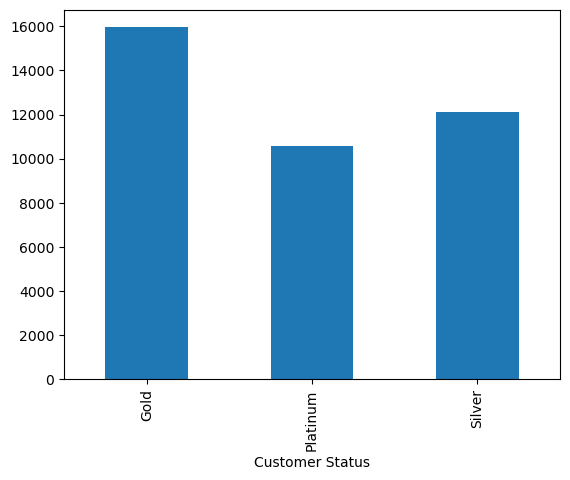

In [43]:
# Pembelian per Kuantitas dari tiap Customer Status
data_clean.groupby(by='Customer Status').agg({'Quantity':'sum'}).plot(kind='bar', legend=False)

Nampaknya Customer dengan status Gold melakukan pembelian paling banyak, dan customer dengan status Platinum yang seharusnya plaing tinggi malah membeli paling sedikit kuantitas barang. Mungkin customer gold membeli lebih banyak barang dengan harga menengah dan customer platinum lebih sedikit barang tapi harganya lebih mahal

In [44]:
# Mengingat Kolom yang dimiliki
data_clean.head(4)

,Order ID,Customer Name,Customer City,Customer State,Customer Status,Order Date,Product ID,Product,Unit Price,Quantity,Discount,Full Price,Extended Price
0,10248,Suzan Plock,Pittsburgh,PA,Silver,2021-01-11 00:00:00,11,Queso Cabrales,14.0,12,0.0,168.0,168.0
1,10248,Suzan Plock,Pittsburgh,PA,Silver,2021-01-11 00:00:00,42,Singaporean Hokkien Fried Mee,9.8,10,0.0,98.0,98.0
2,10248,Suzan Plock,Pittsburgh,PA,Silver,2021-01-11 00:00:00,72,Mozzarella di Giovanni,34.8,5,0.0,174.0,174.0
4,10249,Allan Strate,Miami,FL,Platinum,2021-01-11 00:00:00,14,Tofu,18.6,9,0.0,167.4,167.4


2. Customer Status terhadap rata-rata transaksi per bulannya

In [46]:
# Ubah dulu semua Order Date menjadi datetime lagi agar memudahkan pembagian per bulan
data_platinum['Order Date'] = pd.to_datetime(data_platinum['Order Date'])
data_gold['Order Date'] = pd.to_datetime(data_gold['Order Date'])
data_silver['Order Date'] = pd.to_datetime(data_silver['Order Date'])                                          

C:\Users\JEREMY\AppData\Local\Temp\ipykernel_3440\1057779163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_platinum['Order Date'] = pd.to_datetime(data_platinum['Order Date'])
C:\Users\JEREMY\AppData\Local\Temp\ipykernel_3440\1057779163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gold['Order Date'] = pd.to_datetime(data_gold['Order Date'])
C:\Users\JEREMY\AppData\Local\Temp\ipykernel_3440\1057779163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [47]:
# check jika sudah berhasil diganti
data_platinum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536 entries, 4 to 2129
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order ID         536 non-null    int64         
 1   Customer Name    536 non-null    object        
 2   Customer City    536 non-null    object        
 3   Customer State   536 non-null    object        
 4   Customer Status  536 non-null    object        
 5   Order Date       536 non-null    datetime64[ns]
 6   Product ID       536 non-null    int64         
 7   Product          536 non-null    object        
 8   Unit Price       536 non-null    float64       
 9   Quantity         536 non-null    int64         
 10  Discount         536 non-null    float64       
 11  Full Price       536 non-null    float64       
 12  Extended Price   536 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 58.6+ KB


<Axes: xlabel='Order Date'>

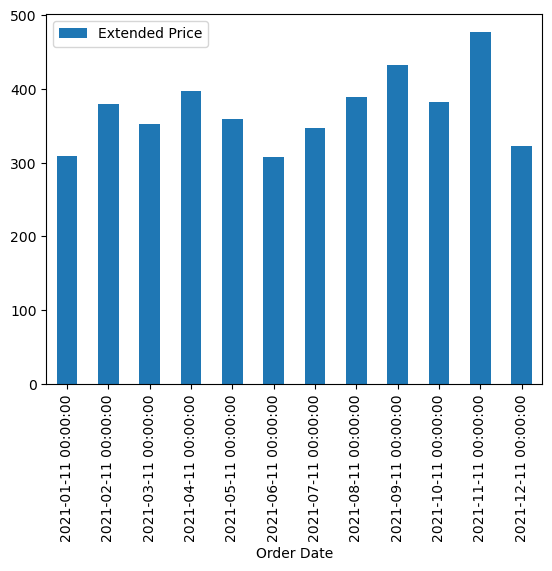

In [49]:
# Pembelian per rata-rata nilai transaksi bagi tiap customer platinum
data_platinum.groupby(by=['Order Date']).agg({'Extended Price':'mean'}).plot(kind='bar', legend=True)

<Axes: xlabel='Order Date'>

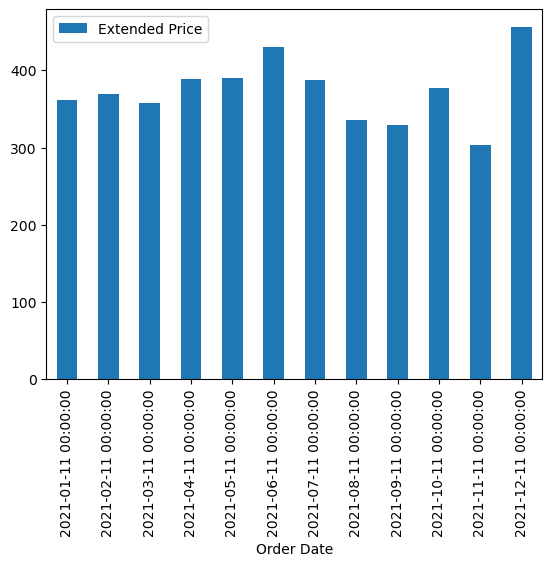

In [50]:
data_gold.groupby(by=['Order Date']).agg({'Extended Price':'mean'}).plot(kind='bar', legend=True)

<Axes: xlabel='Order Date'>

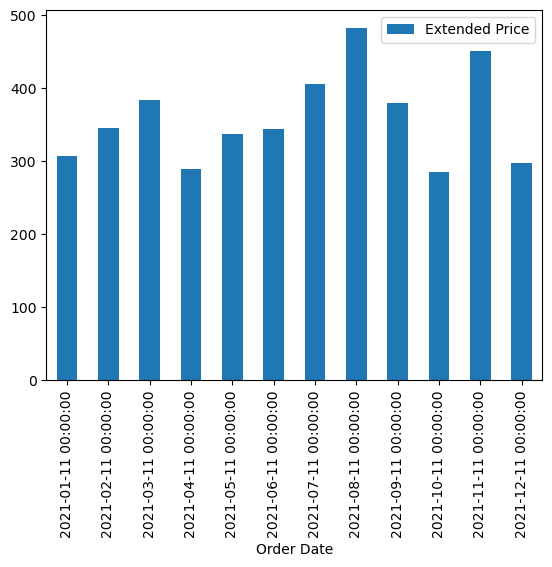

In [51]:
data_silver.groupby(by=['Order Date']).agg({'Extended Price':'mean'}).plot(kind='bar', legend=True)

3. Customer Status dan tiap diskon per bulannya

In [52]:
# Memasukan data diskon ke dalam tiap tiap dataframe status
platinum_discount = data_platinum['Full Price']*data_platinum['Discount']
gold_discount = data_gold['Full Price']*data_gold['Discount']
silver_discount = data_silver['Full Price']*data_silver['Discount']

data_platinum['Discounted Price'] = platinum_discount
data_gold['Discounted Price'] = gold_discount
data_silver['Discounted Price'] = silver_discount

C:\Users\JEREMY\AppData\Local\Temp\ipykernel_3440\3263435668.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_platinum['Discounted Price'] = platinum_discount
C:\Users\JEREMY\AppData\Local\Temp\ipykernel_3440\3263435668.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gold['Discounted Price'] = gold_discount
C:\Users\JEREMY\AppData\Local\Temp\ipykernel_3440\3263435668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [53]:
data_platinum.head(2) # terlihat bahwa telah berhasil data diskon dimasukan

,Order ID,Customer Name,Customer City,Customer State,Customer Status,Order Date,Product ID,Product,Unit Price,Quantity,Discount,Full Price,Extended Price,Discounted Price
4,10249,Allan Strate,Miami,FL,Platinum,2021-01-11,14,Tofu,18.6,9,0.00,167.4,167.4,0.000000
5,10250,Elnora Willison,Philadelphia,PA,Platinum,2021-01-11,51,Manjimup Dried Apples,42.4,35,0.15,1484.0,1261.4,222.600009


<Axes: xlabel='Order Date'>

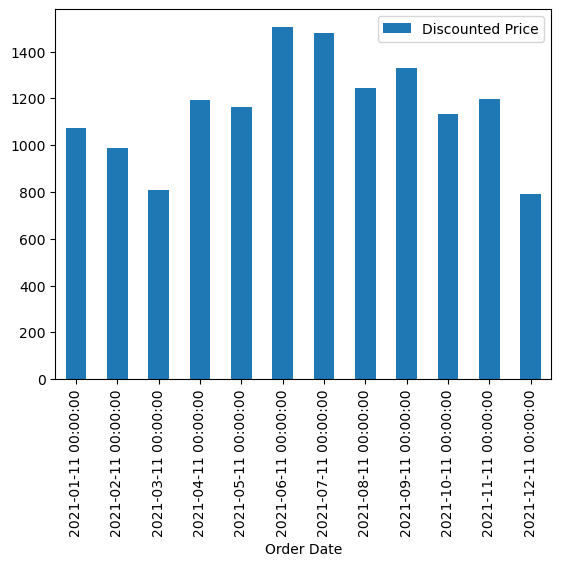

In [56]:
data_platinum.groupby(by=['Order Date']).agg({'Discounted Price':'sum'}).plot(kind='bar', legend=True)

<Axes: xlabel='Order Date'>

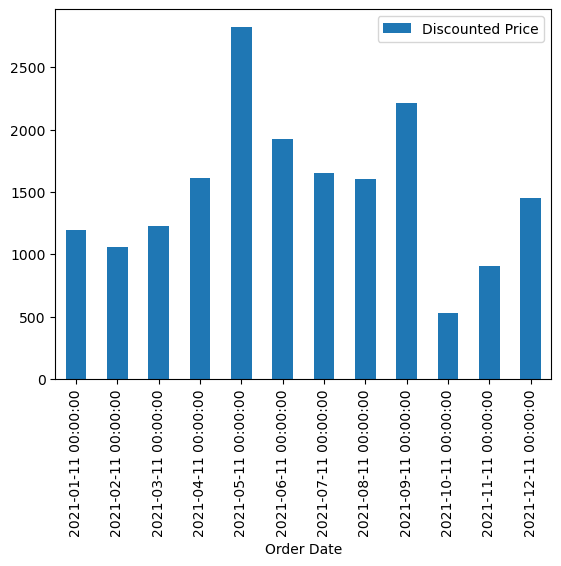

In [57]:
data_gold.groupby(by=['Order Date']).agg({'Discounted Price':'sum'}).plot(kind='bar', legend=True)

<Axes: xlabel='Order Date'>

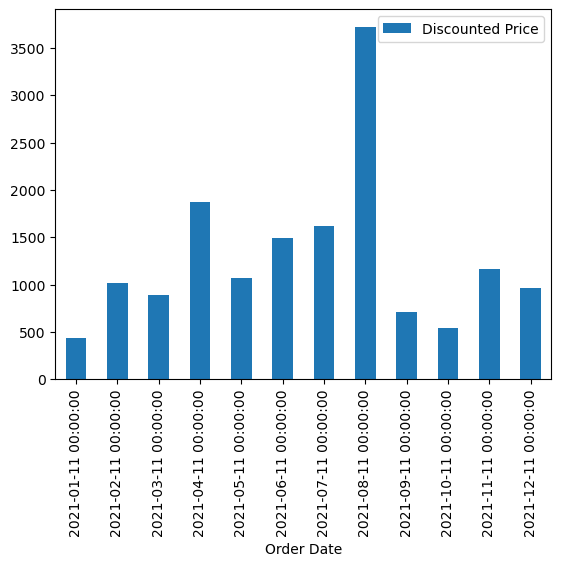

In [58]:
data_silver.groupby(by=['Order Date']).agg({'Discounted Price':'sum'}).plot(kind='bar', legend=True)

Berdasarkan hasil visualisasi yang dilakukan didapatlah informasi bahwa terdapat perbedaan budaya pembelian barang dari tiap customer status. Customer Status platinum biasanya membeli barang dengan total transaksi paling banyak pada November dan September, serta April. Customer Status Gold biasanya membeli paling banyak Desember dan Juni dengan trend menurun pada akhir tahun (diatas juni), dan stabil pada awal tahun (sebelum juni). Customer Status Silver memiliki trend naik turun dengan puncak belanja pada Bulan Maret, September, dan November seperti gunung. Nampaknya Customer Platinum dan Gold memiliki kebiasaan untuk lebih banyak membeli barang pada bulan-bulan akhir tahun terlebih pada bulan-bulan liburan akhir tahun dan natalan. Khusus untuk customer gold memiliki kestabilan dalam membeli barang pada awal tahun namun menurun pada akhir tahun dan memuncak pada bulan natalan dan tahun baru (Hal ini perlu diselidiki lebih lanjut).
<br><br>
Bagi hasil diskon, dapat dilihat bahwa customer dengan status gold mendapatkan diskon yang menengah dimana bulan Maret dan September menjadi bulan dimana mereka mendapatkan diskon paling banyak, sedangkan customer silver mendapatkan diskon dengan nilai paling tinggi yaitu diatas $3500 dengan bulan April dan September sebagai bulan dimana mereka mendapatkan lebih banyak diskon. Customer dengan tingkat platinum nampaknya mendapatkan diskon yang paling stabil diantara semua customer. Fenomena ini mungkin disebabkan oleh kebijakan diskon yang bisnis miliki, platinum memiliki keleluasaan yang lebih dalam mendapatkan diskon dibanding customer gold dan silver. Hal ini perlu diinvestigasi lebih lanjut untuk mengetahui mengapa ini terjadi, event apa yang menyebabkannya.

## G. Customer Status yang paling banyak mendapatkan Diskon

In [59]:
# Memasukan data diskon ke dalam dataframe baru karena dibutuhkan
# Harus dihitung dulu
Total_discount = data_clean['Full Price']*data_clean['Discount']
Total_discount

0         0.000000
1         0.000000
2         0.000000
4         0.000000
5       222.600009
           ...    
2150      0.000000
2151      3.800000
2152      1.800000
2153      0.300000
2154      4.080000
Length: 1898, dtype: float64

In [60]:
# Masukan hasil hitungannya ke dalam dataframe baru yang diisi dengan
# Customer Status dan Total Diskon agar memudahkan analisis
discount_data = data_clean[['Customer Status']]
discount_data['Discount'] = Total_discount
discount_data

C:\Users\JEREMY\AppData\Local\Temp\ipykernel_3440\2443300862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discount_data['Discount'] = Total_discount


,Customer Status,Discount
0,Silver,0.000000
1,Silver,0.000000
2,Silver,0.000000
4,Platinum,0.000000
5,Platinum,222.600009
...,...,...
2150,Silver,0.000000
2151,Silver,3.800000
2152,Silver,1.800000
2153,Silver,0.300000


<Axes: xlabel='Customer Status'>

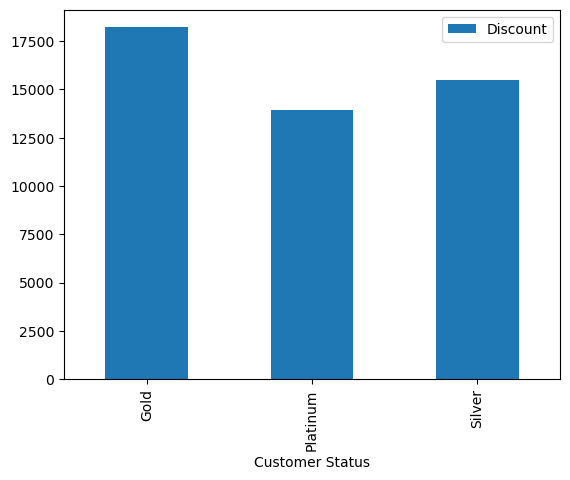

In [61]:
discount_data.groupby(by='Customer Status').agg({'Discount':'sum'}).plot(kind='bar')

In [62]:
condition = discount_data['Discount'] > 0
customer_with_discount = discount_data[condition]
customer_with_discount

,Customer Status,Discount
5,Platinum,222.600009
7,Platinum,37.800002
9,Platinum,5.040000
10,Platinum,11.700000
11,Platinum,2.500000
...,...,...
2144,Silver,0.500000
2151,Silver,3.800000
2152,Silver,1.800000
2153,Silver,0.300000


In [63]:
customer_with_discount['Customer Status'].value_counts()

Gold        291
Silver      226
Platinum    202
Name: Customer Status, dtype: int64

Berdasarkan data, dapat dilihat bahwa  Customer dengan status gold lebih banyak mendapatkan diskon. Hal ini tentunya berefek dari frekuensi customer gold melakukan transaksi yang jauh diatas dari status customer lainnya

## H. Strategi Suntikan Dana ke Produk

Jika melihat dari kepopuleran produk secara universal pada seluruh negara bagian maka, produk yang harus diberikan diskon merupakan produk yang tidak populer atau biasa saja kepopulerannya. Tentu saja hal ini perlu diselediki lagi, jika misalkan kita memberikan diskon ke produk Alice Mutton, Chai, dan Aniseed Soup maka kita perlu mendapatkan feedback dulu dari customer mengapa produk ini sangat tidak disukai. Pengambilan data sendiri baiknya dilakukan berdasarkan negara bagian karena setiap negara bagian seperti yang telah kita lihat, memiliki produk popular dan tidak popularnya sendiri-sendiri. Menurut saya ini adalah langkah yang paling baik untuk menentukan produk yang layak diberi diskon, harus dicari terlebih dahulu mengapa produk tidak populer, jika masalahnya berhubungan dengan harga maka barulah diskon bisa dimasukan, jika tidak maka produk lainlah yang harus diberikan diskon. 
<br><br>
Pilihan kedua yang bisa dilakukan adalah melakukan generalisasi kepopuleran atau ketidakpopuleran produk berdasarkan status customer kemudian diterapkan ke negara-negara bagian yang memiliki customer dengan jumlah status terbanyak tertentu. Dalam hal ini, kita bisa memilih 1 produk untuk tiap customer status yang paling tidak populer dan memberikan discount yaitu produk: Chef Anton's Gumbo Mix untuk Silver, Louisiana Hot Spiced Okra untuk Gold, dan Gravad lax  untuk Platinum. Discount tidak diberikan ke produk yang populer karena memiliki potensi memberikan kerugian. Apakah dengan memberikan diskon ke produk populer akan menaikan kuantitas dan frekuensi pembelian produk tersebut? Tentu. Apakah total barang yang dibeli akan memberikan pengembalian modal yang sesuai? Tidak tahu, sehingga menurut saya, promosi produk yang kurang populer perlu dilakukan terlebih dahulu